In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
players = pd.read_csv('players.csv')

In [6]:
list(players.columns)

['date',
 'player_name',
 'team',
 'opponent',
 'country',
 'player_id',
 'match_id',
 'event_id',
 'event_name',
 'best_of',
 'map_1',
 'map_2',
 'map_3',
 'kills',
 'assists',
 'deaths',
 'hs',
 'flash_assists',
 'kast',
 'kddiff',
 'adr',
 'fkdiff',
 'rating',
 'm1_kills',
 'm1_assists',
 'm1_deaths',
 'm1_hs',
 'm1_flash_assists',
 'm1_kast',
 'm1_kddiff',
 'm1_adr',
 'm1_fkdiff',
 'm1_rating',
 'm2_kills',
 'm2_assists',
 'm2_deaths',
 'm2_hs',
 'm2_flash_assists',
 'm2_kast',
 'm2_kddiff',
 'm2_adr',
 'm2_fkdiff',
 'm2_rating',
 'm3_kills',
 'm3_assists',
 'm3_deaths',
 'm3_hs',
 'm3_flash_assists',
 'm3_kast',
 'm3_kddiff',
 'm3_adr',
 'm3_fkdiff',
 'm3_rating',
 'kills_ct',
 'deaths_ct',
 'kddiff_ct',
 'adr_ct',
 'kast_ct',
 'rating_ct',
 'kills_t',
 'deaths_t',
 'kddiff_t',
 'adr_t',
 'kast_t',
 'rating_t',
 'm1_kills_ct',
 'm1_deaths_ct',
 'm1_kddiff_ct',
 'm1_adr_ct',
 'm1_kast_ct',
 'm1_rating_ct',
 'm1_kills_t',
 'm1_deaths_t',
 'm1_kddiff_t',
 'm1_adr_t',
 'm1_kast_t',
 '

We aren't going to be making any predictions specific to the side being played (T or CT), so lets drop those columns for now.

In [7]:
players = players.loc[:, players.columns[:53]]

Now let's look for any missing data, we'll take it in sections so it's easier to read.

In [8]:
sns.heatmap(players[players.columns[:10]].isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

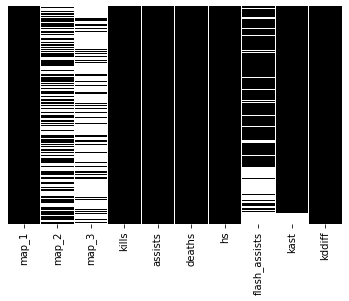

In [9]:
sns.heatmap(players[players.columns[10:20]].isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

In [10]:
sns.heatmap(players[players.columns[20:30]].isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

In [11]:
sns.heatmap(players[players.columns[30:40]].isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

In [12]:
sns.heatmap(players[players.columns[40:54]].isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

About 1/3 of the matches don't have data for flash_assists, so lets drop that column

In [13]:
players.drop(['m1_flash_assists', 'm2_flash_assists', 'm3_flash_assists'], axis=1, inplace=True)

In [14]:
m1stats = players.loc[:, [
 'match_id',
 'player_name',
 'team',
 'best_of',
 'm1_kills',
 'm1_assists',
 'm1_deaths',
 'm1_hs',
 'm1_kast',
 'm1_kddiff',
 'm1_adr',
 'm1_fkdiff',
 'm1_rating',
 'map_1'
]]

In [15]:
m2stats = players.loc[:, [
 'match_id',
 'player_name',
 'team',
 'best_of',
 'm2_kills',
 'm2_assists',
 'm2_deaths',
 'm2_hs',
 'm2_kast',
 'm2_kddiff',
 'm2_adr',
 'm2_fkdiff',
 'm2_rating',
 'map_2'
]]

In [16]:
m3stats = players.loc[:, [
 'match_id',
 'player_name',
 'team',
 'best_of',
 'm3_kills',
 'm3_assists',
 'm3_deaths',
 'm3_hs',
 'm3_kast',
 'm3_kddiff',
 'm3_adr',
 'm3_fkdiff',
 'm3_rating',
 'map_3'
]]

In [17]:
col_rename = {
'm1_kills':'kills',
'm1_assists':'assists',
'm1_deaths':'deaths',
'm1_hs':'hs',
'm1_kast':'kast',
'm1_kddiff':'kddiff',
'm1_adr':'adr',
'm1_fkdiff':'fkdiff',
'm1_rating':'rating',
'map_1':'_map',
'm2_kills':'kills',
'm2_assists':'assists',
'm2_deaths':'deaths',
'm2_hs':'hs',
'm2_kast':'kast',
'm2_kddiff':'kddiff',
'm2_adr':'adr',
'm2_fkdiff':'fkdiff',
'm2_rating':'rating',
'map_2':'_map',
'm3_kills':'kills',
'm3_assists':'assists',
'm3_deaths':'deaths',
'm3_hs':'hs',
'm3_kast':'kast',
'm3_kddiff':'kddiff',
'm3_adr':'adr',
'm3_fkdiff':'fkdiff',
'm3_rating':'rating',
'map_3':'_map'
}

In [18]:
m1stats.rename(columns = col_rename, inplace=True)

In [19]:
m2stats.rename(columns = col_rename, inplace=True)

In [20]:
m3stats.rename(columns = col_rename, inplace=True)

In [21]:
m1stats['map'] = 1

In [22]:
m2stats['map'] = 2

In [23]:
m3stats['map'] = 3

In [24]:
mapstats = pd.concat([m1stats, m2stats, m3stats], axis=0)

In [25]:
mapstats['_map'].value_counts(dropna=False)

NaN            501433
Mirage         132422
Inferno        103455
Train           88154
Overpass        76997
Cache           74738
Dust2           59226
Nuke            52237
Cobblestone     51392
Vertigo          7023
Default          2874
Name: _map, dtype: int64

In [26]:
index = pd.MultiIndex.from_frame(mapstats[['match_id', 'map', 'player_name']])

In [27]:
mapstats.set_index(index, inplace=True)

In [51]:
mapstats.dropna(inplace=True)

In [52]:
sns.heatmap(mapstats.isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

# Visual Analysis

(array([2.2180e+03, 8.8210e+03, 2.0259e+04, 3.4840e+04, 0.0000e+00,
        4.8236e+04, 5.9074e+04, 6.4816e+04, 6.6110e+04, 0.0000e+00,
        6.3058e+04, 5.6942e+04, 4.8408e+04, 0.0000e+00, 3.9164e+04,
        3.0718e+04, 2.3020e+04, 1.6834e+04, 0.0000e+00, 1.1980e+04,
        8.2640e+03, 5.5920e+03, 0.0000e+00, 3.6940e+03, 2.3140e+03,
        1.6210e+03, 1.0130e+03, 0.0000e+00, 6.4400e+02, 4.0800e+02,
        2.3900e+02, 0.0000e+00, 1.7300e+02, 1.0900e+02, 7.1000e+01,
        3.0000e+01, 0.0000e+00, 2.8000e+01, 2.8000e+01, 9.0000e+00,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.78,  1.56,  2.34,  3.12,  3.9 ,  4.68,  5.46,  6.24,
         7.02,  7.8 ,  8.58,  9.36, 10.14, 10.92, 11.7 , 12.48, 13.26,
        14.04, 14.82, 15.6 , 16.38, 17.16, 17.94, 18.72, 19.5 , 20.28,
        21.06, 21.84, 22.62, 23.4 , 24.18, 24.96, 25.74, 26.52, 27.3 ,
        28.08, 28.86, 29.64, 30.42

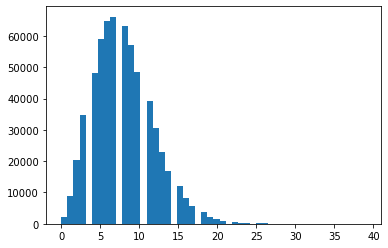

In [59]:
plt.hist(mapstats['hs'], bins=50)

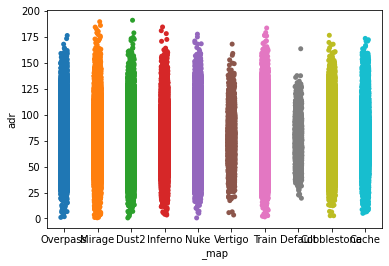

In [60]:
sns.stripplot(data=mapstats, x='_map', y='adr')

[(70.0, 80.0)]

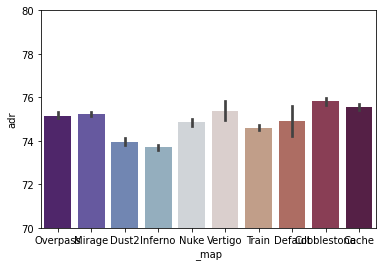

In [71]:
ax = sns.barplot(data=mapstats, x='_map', y='adr', palette='twilight_shifted')
ax.set(ylim=(70, 80))

## Encode categorical data

In [92]:
mapstats.drop(['match_id', 'map', 'team', 'kddiff', 'best_of'], axis=1, inplace=True)

KeyError: "['match_id' 'map' 'team' 'kddiff'] not found in axis"

In [95]:
mapstats

player_name  kills  assists  deaths    hs  kast  \
match_id map player_name                                                   
2339385  1   Brehze           Brehze   11.0      3.0    18.0   5.0  65.2   
             CeRq               CeRq   11.0      2.0    17.0   4.0  60.9   
             EliGE             EliGE   15.0      3.0    12.0   9.0  69.6   
             Ethan             Ethan   11.0      1.0    15.0   6.0  65.2   
             NAF                 NAF   10.0      5.0    12.0   3.0  65.2   
...                              ...    ...      ...     ...   ...   ...   
2299646  3   ScreaM           ScreaM   27.0      3.0    16.0  18.0  77.8   
             apEX               apEX   21.0      3.0    20.0  14.0  74.1   
             kennyS           kennyS   12.0      3.0    19.0   5.0  59.3   
             kioShiMa       kioShiMa   23.0      3.0    19.0  15.0  70.4   
             shox               shox   26.0      0.0    17.0  10.0  66.7   

                           adr  fkdiff  rating  Cobblestone  Default  Dust2  \
match_id map player_name                                                      
2339385  1   Brehze       60.8    -1.0    0.70            0        0      0   
             CeRq         68.9    -1.0    0.75            0        0      0   
             EliGE        77.0     3.0    1.32            0        0      0   
             Ethan        60.7    -2.0    0.73            0        0      0   
             NAF          51.5     0.0    0.83            0        0      0   
...                        ...     ...     ...          ...      ...    ...   
2299646  3   ScreaM       99.0    -3.0    1.39            0        0      0   
             apEX         76.4    -1.0    1.07            0        0      0   
             kennyS       47.4     0.0    0.72            0        0      0   
             kioShiMa     86.3    -1.0    1.16            0        0      0   
             shox         93.3     1.0    1.31            0        0      0   

                          Inferno  Mirage  Nuke  Overpass  Train  Vertigo  
match_id map player_name                                                   
2339385  1   Brehze             0       0     0         1      0        0  
             CeRq               0       0     0         1      0        0  
             EliGE              0       0     0         1      0        0  
             Ethan              0       0     0         1      0        0  
             NAF                0       0     0         1      0        0  
...                           ...     ...   ...       ...    ...      ...  
2299646  3   ScreaM             0       0     0         0      1        0  
             apEX               0       0     0         0      1        0  
             kennyS             0       0     0         0      1        0  
             kioShiMa           0       0     0         0      1        0  
             shox               0       0     0         0      1        0  

[618747 rows x 18 columns]

In [79]:
dummies = pd.get_dummies(mapstats['_map'], drop_first=True)

In [80]:
mapstats = pd.concat([mapstats.drop('_map', axis=1), dummies], axis=1)

In [96]:
mapstats.set_index('player_name', inplace=True)

# Machine Learning Model

In [101]:
from sklearn import metrics

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(mapstats.drop('kills', axis=1), mapstats['kills'], test_size=0.3, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rfr = RandomForestRegressor()

In [105]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
rfr_preds = rfr.predict(X_test)

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_preds))
print('MSE:', metrics.mean_squared_error(y_test, rfr_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_preds)))

MAE: 1.3781153723905726
MSE: 3.1797964192134685
RMSE: 1.7831983678810017


In [108]:
sns.scatterplot(y_test, rfr_preds)

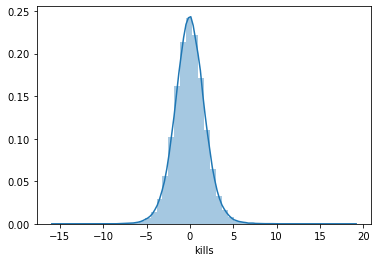

In [109]:
sns.distplot((y_test-rfr_preds), bins=50)

# Model 1 conclusion

Essentially I reshaped the data to cover each matchup of teams, each map played during that matchup, and each player's stats on that map.
I eventually dropped all of the NA rows since they were quite a small portion of the final row count.
This process made sense to me in my understanding of the game, it allows you to basically see the scoreboard of each game played, although after running the model a second time without reshaping the data, I found it was not to the benefit of the ML model.

The model is given relevant player statistics for a map played and predicts the number of kills they scored in that game.

This model was only off by about 1-2 kills, which is pretty good, as the range of possible kill scores in this game is typically between 0-40, and varies greatly depending on the player and matchup.